In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [94]:
class FNN(nn.Module):

    def __init__(self):
        super(FNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, 5, 1, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = nn.functional.log_softmax(x, dim=1)
        return x

In [95]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

In [96]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [97]:
model = FNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [98]:
def train(model, loader, optimizer, loss_fn, epochs):
    model.train()
    train_loss_arr = []
    test_loss_arr = []
    for epoch in range(epochs):
        total_loss = 0
        total_samples=0
        total_correct=0
        for i, (data, target) in enumerate(loader):
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_loss_arr.append(total_loss/len(loader))

        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                output = model(images)
                test_loss += loss_fn(output, labels).item()
                _, predicted = torch.max(output.data, 1)
                # print(labels,predicted)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                # print(correct)
        test_loss_arr.append(test_loss)
        print("Accuracy: ", correct/total)
        print("Epoch: ",epoch+1, "Train Loss: ", train_loss_arr[-1] ,", ", "Test Loss: ", test_loss_arr[-1])
    
    return train_loss_arr, test_loss_arr

In [99]:
train_loss, test_loss = train(model, train_loader, optimizer, loss_fn, epochs=30)


Accuracy:  0.1132
Epoch:  1 Train Loss:  2.299340228282058 ,  Test Loss:  22.948171854019165
Accuracy:  0.3212
Epoch:  2 Train Loss:  2.289986962702737 ,  Test Loss:  22.838214635849
Accuracy:  0.3163
Epoch:  3 Train Loss:  2.2759880442609157 ,  Test Loss:  22.65421748161316
Accuracy:  0.3403
Epoch:  4 Train Loss:  2.2485832814722935 ,  Test Loss:  22.243059635162354
Accuracy:  0.443
Epoch:  5 Train Loss:  2.1772288767767867 ,  Test Loss:  21.054807901382446
Accuracy:  0.589
Epoch:  6 Train Loss:  1.928407405612311 ,  Test Loss:  16.411083698272705
Accuracy:  0.7781
Epoch:  7 Train Loss:  1.1786681552812743 ,  Test Loss:  8.06805270910263
Accuracy:  0.837
Epoch:  8 Train Loss:  0.6759901270429208 ,  Test Loss:  5.695286065340042
Accuracy:  0.8676
Epoch:  9 Train Loss:  0.524545199454212 ,  Test Loss:  4.679809778928757
Accuracy:  0.8807
Epoch:  10 Train Loss:  0.44737490431776944 ,  Test Loss:  4.0239366590976715
Accuracy:  0.8917
Epoch:  11 Train Loss:  0.39925450695031234 ,  Test Los

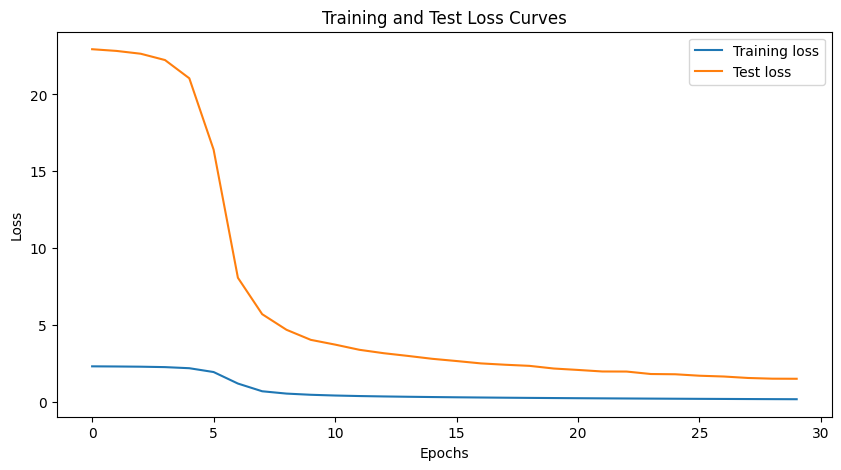

In [100]:


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Test loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()